In [1]:
%run sunny.py

In [2]:
# imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import math

In [3]:
# load data
tmp_data = np.array(pd.read_csv('omni2_daily_eHiYe82FKM.lst', sep='\s+'))
print(tmp_data[:10, :])
print(tmp_data.shape)

data = pd.DataFrame(tmp_data, columns=['Year', 'DOY', 'Hour', 'B', 'Kp', 'R', 'Dst', 'ap', 'F10.7', 'AE', 'AL', 'AU', 'pc', 'Lyman-alpha'])
# DOY | Dst 
data.head()
N = data['Dst'].size

[[ 1.9650e+03  2.0000e+00  0.0000e+00  9.9990e+02  2.3000e+01  3.7000e+01
   1.1000e+01  1.1000e+01  8.1500e+01  1.4700e+02  9.9999e+04  9.9999e+04
   9.9990e+02  6.2620e-03]
 [ 1.9650e+03  3.0000e+00  0.0000e+00  9.9990e+02  1.3000e+01  4.4000e+01
   4.0000e+00  7.0000e+00  7.9400e+01  6.9000e+01  9.9999e+04  9.9999e+04
   9.9990e+02  6.2620e-03]
 [ 1.9650e+03  4.0000e+00  0.0000e+00  9.9990e+02  1.0000e+01  4.4000e+01
   1.2000e+01  4.0000e+00  7.8000e+01  8.6000e+01  9.9999e+04  9.9999e+04
   9.9990e+02  6.2270e-03]
 [ 1.9650e+03  5.0000e+00  0.0000e+00  9.9990e+02  7.0000e+00  3.7000e+01
   7.0000e+00  2.0000e+00  7.7400e+01  4.4000e+01  9.9999e+04  9.9999e+04
   9.9990e+02  6.2620e-03]
 [ 1.9650e+03  6.0000e+00  0.0000e+00  9.9990e+02  3.0000e+00  2.8000e+01
   1.1000e+01  2.0000e+00  7.7700e+01  3.3000e+01  9.9999e+04  9.9999e+04
   9.9990e+02  6.2620e-03]
 [ 1.9650e+03  7.0000e+00  0.0000e+00  9.9990e+02  1.3000e+01  2.6000e+01
   1.3000e+01  4.0000e+00  7.5700e+01  5.5000e+01  

In [85]:
def get_generator_3sin(delta, p, t1, t2, t3, A_sin_1, D_1, B_2, D_2):
    freq1 = math.pi * 2 / t1
    freq2 = math.pi * 2 / t2
    freq3 = math.pi * 2 / t3
    print(freq1, freq2, freq3)
    def foo(day, prev, gen):
        d = day % 365
        val = p * prev
        if in_spring_delta(d, delta) or in_autumn_delta(d, delta):
            to_add = 0
            to_add += gen.normal(A_sin_1 * math.sin(freq1 * day), D_1)
            to_add += gen.normal(A_sin_1 * math.sin(freq2 * day), D_1)
            to_add += gen.normal(A_sin_1 * math.sin(freq3 * day), D_1)
            to_add /= 3
            val += to_add
            #print(to_add)
        else:
            val += gen.normal(B_2 * math.sin(freq1 * day), D_2)
        return val
    return Generative(foo)

In [107]:
my_generator = get_generator_3sin(delta=30, p=0.85, t1=27, t2=24, t3=28, A_sin_1=18.5 * 0.55, D_1=2 * 0.6, B_2 = 4, D_2 = 1)
dt = imitate_Dst_new(my_generator, N)

0.23271056693257727 0.2617993877991494 0.2243994752564138


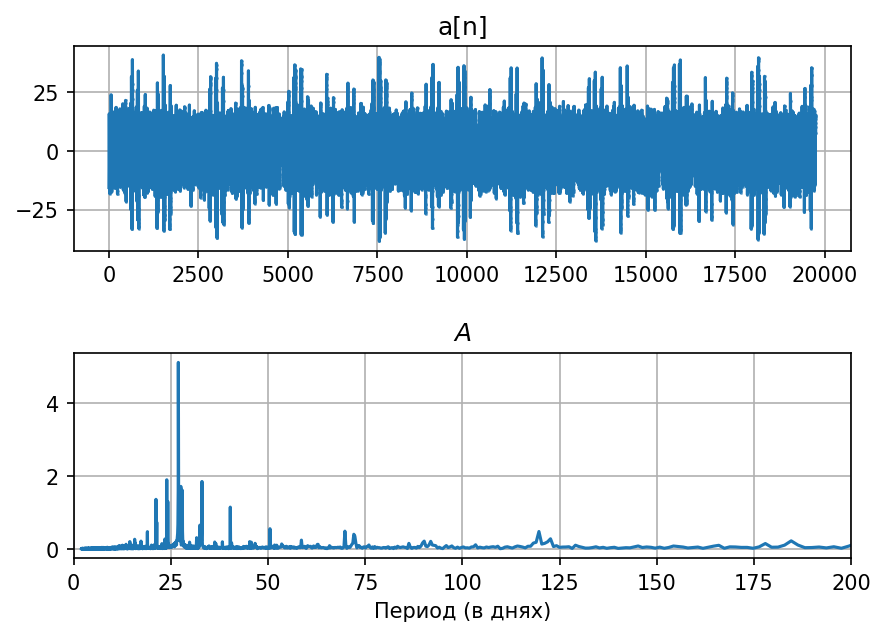

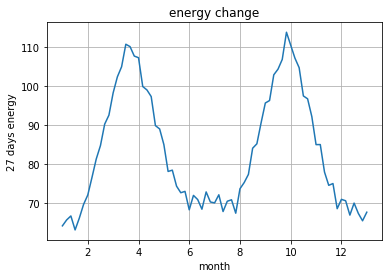

(110.622087249918, 67.30925174527316, 113.69602221429327)

In [108]:
arrx = pd.DataFrame(dt, columns=['Dst'])
arrx['DOY'] = np.arange(0, len(arrx['Dst']))
mFFT(dt, draw=True, x1=0, x2=200)
retrieve_energy(arrx, draw=True)

In [7]:
dt

[-18.691923387955068,
 -20.119972084446545,
 -18.190002119376793,
 -13.048162375838173,
 -15.70633151835579,
 -17.965709618399146,
 -12.632781913609707,
 -11.346905709956616,
 -15.20154739720293,
 -14.42985511327863,
 -17.797827617536683,
 -20.669852489187207,
 -20.28030552954499,
 -28.57016067874443,
 -34.863087906984894,
 -35.56155483790105,
 -37.957426093553586,
 -34.68560284913946,
 -36.793638723853384,
 -40.60258772061654,
 -32.32838448683784,
 -32.06101201575831,
 -30.660527394642866,
 -35.43922103030026,
 -35.97964877385595,
 -33.817791098938095,
 -37.02787674378659,
 -33.64968315883591,
 -34.68356544468575,
 -34.32658562715599,
 -35.26320423200018,
 -26.243390859164396,
 -26.039651129241474,
 -30.043327175678854,
 -25.925428450914268,
 -30.598768783161216,
 -28.85227908566801,
 -36.04189771833691,
 -39.6271372561801,
 -36.57440172427659,
 -31.813155145653457,
 -30.034488749045558,
 -29.670688566241687,
 -30.103280063662588,
 -35.18065601558291,
 -36.46171444682431,
 -36.5137923